#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2018


# Homework 1:  Basic Machine Learning + Learning to Rank 

### 100 points [5% of your final grade]

### Due: Monday, February 12 by 11:59pm

*Goals of this homework:* In this homework you will get hands-on experience with (i) the basics of machine learning (e.g. train/test data, cross-validation, different classifiers) and interpreting results; and (ii) learning to rank.

*Submission Instructions:* To submit your homework, rename this notebook as UIN_hw#.ipynb. For example, this homework submission would be: YourUIN_hw1.ipynb. Submit this notebook via ecampus. Your notebook should be completely self-contained, with the results visible in the notebook. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after Thursday, February 15 at 11:59pm.

*Collaboration policy:* You are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. You may post on Piazza, search StackOverflow, etc. But if you do get help in this way, you must inform us by **filling out the Collaboration Declarations at the bottom of this notebook**. 

*Example: I found helpful code on stackoverflow at https://stackoverflow.com/questions/11764539/writing-fizzbuzz that helped me solve Problem 2.*

The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.

# Part 1: Basics of ML (70 points)

For this part, we're going to get familiar with scikit-learn (a great ML toolkit that is very popular) and the major issues in training a model, testing it, and interpreting the results. Our goal in this assignment is to build a classifier to determine if a Yelp review is "food-relevant" or not.

## Dataset: Yelp review data

First, you will need to download the training_data.json file from the Resources tab on Piazza, a collection of 40,000 json-encoded Yelp reviews we sampled from the [Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge).

You'll see that each line corresponds to a review on a particular business. The label (class) information of each review is in the "label" field. It is **either "Food-relevant" or "Food-irrelevant"**.

## Part 1.1: Parsing Yelp (15 points)

For this first part, we will build a parser for extracting tokens from the **review text** only. First, you should tokenize each review using **whitespaces and punctuations as delimiters**. Do not remove stopwords. You should apply casefolding (lower case everything) and use the [nltk Porter stemmer](http://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) ... you may need to install nltk if you don't have it already. 

In [2]:
import json
import re
from nltk.stem.porter import PorterStemmer

with open('training_data_med.json') as file:
    listReviews = []
    for line in file:
        data = json.loads(line)
        review_text = data['text'].lower()
        listTokens = re.findall('\w+', review_text)
        stemmer = PorterStemmer()
        listStemTokens = [ stemmer.stem(word) for word in listTokens]
        listReviews.append(listStemTokens)
print(listReviews)

[[u'dr', u'goldberg', u'offer', u'everyth', u'i', u'look', u'for', u'in', u'a', u'gener', u'practition', u'he', u's', u'nice', u'and', u'easi', u'to', u'talk', u'to', u'without', u'be', u'patron', u'he', u's', u'alway', u'on', u'time', u'in', u'see', u'hi', u'patient', u'he', u's', u'affili', u'with', u'a', u'top', u'notch', u'hospit', u'nyu', u'which', u'my', u'parent', u'have', u'explain', u'to', u'me', u'is', u'veri', u'import', u'in', u'case', u'someth', u'happen', u'and', u'you', u'need', u'surgeri', u'and', u'you', u'can', u'get', u'referr', u'to', u'see', u'specialist', u'without', u'have', u'to', u'see', u'him', u'first', u'realli', u'what', u'more', u'do', u'you', u'need', u'i', u'm', u'sit', u'here', u'tri', u'to', u'think', u'of', u'ani', u'complaint', u'i', u'have', u'about', u'him', u'but', u'i', u'm', u'realli', u'draw', u'a', u'blank'], [u'unfortun', u'the', u'frustrat', u'of', u'be', u'dr', u'goldberg', u's', u'patient', u'is', u'a', u'repeat', u'of', u'the', u'experi',

### Unique tokens?

Once you have your parser working, you should report here the size of your feature space. That is, how many unique tokens do you find?

In [4]:
setTokens = set()
for review in listReviews:
    for token in review:
        setTokens.add(token)
print('Size of feature space (5000 reviews considered) : {}'.format(len(setTokens)))

Size of feature space (5000 reviews considered) : 12963


### The Most Popular Words

Great, now we can tokenize the documents. Let's make a list of the most popular words in our reviews. For this step, you should maintain a count of how many times each word occurs. Then you should print out the top-20 words in your reviews.

Your output should look like this:

Rank Token Count

1 awesome 78

... ...

In [4]:
dictWordCnt = {}
for review in listReviews:
    for token in review:
        if token in dictWordCnt.keys():
            dictWordCnt[token] += 1
        else :
            dictWordCnt[token] = 1
# sort the dictionary
cnt = 0
listSortedKeys = sorted(dictWordCnt, key=dictWordCnt.get, reverse=True)
for w in listSortedKeys:
    cnt += 1
    print w, ':', dictWordCnt[w]
    if cnt >= 20:
        break

the : 30459
and : 19248
i : 18065
a : 16187
to : 13625
it : 9319
of : 9151
wa : 9044
is : 7623
in : 7017
for : 6871
that : 5733
my : 4904
you : 4889
but : 4743
they : 4647
with : 4587
s : 4538
thi : 4407
on : 4197


### Zipf's Law

Recall in class our discussion of Zipf's law. Let's see if this law applies to our Yelp reviews. You should use matplotlib to plot the log-base10 term counts on the y-axis versus the log-base10 rank on the x-axis. Your aim is to create a figure like the one in Figure 5.2 of the textbook.

Text(0,0.5,u'log(term freq)')

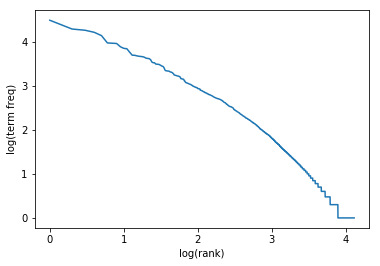

In [6]:
import math
%matplotlib inline  

listLogRanks = []
listLogFreq = []
for index, word in enumerate(listSortedKeys):
    listLogRanks.append(math.log10(index + 1)) #index + 1 is the rank of the word
    listLogFreq.append(math.log10(dictWordCnt[word]))

import matplotlib.pyplot as plt
plt.plot(listLogRanks, listLogFreq)
plt.xlabel('log(rank)')
plt.ylabel('log(term freq)')

What do you observe? Is this consistent with Zipf's law?

Zipf's law states that the frequency of any word is inversely proportional to its rank i.e tc = k/r. Taking log on both sides, we have log(tc) = log(k) - log(r). So, the graph of log(tc) vs log(r) should be a straight line and this holds (approximately) for the observed data.


## Part 1.2: Feature Represenation (10 points)

In this part you will build feature vectors for each review. This will be input to our ML classifiers. You should call your parser from earlier, using all the same assumptions (e.g., casefolding, stemming). Each feature value should be the term count for that review.

In [3]:
listFeatures = []
for review in listReviews:
    dictWordCnt = {}
    for token in review:
        if token in dictWordCnt.keys():
            dictWordCnt[token] += 1
        else :
            dictWordCnt[token] = 1
    listFeatures.append(dictWordCnt)
print(listFeatures)

[{u'and': 3, u'practition': 1, u'patron': 1, u'specialist': 1, u'do': 1, u'tri': 1, u'is': 1, u'blank': 1, u'ani': 1, u'him': 2, u'realli': 2, u'case': 1, u'see': 3, u'goldberg': 1, u'have': 3, u'in': 3, u'need': 2, u'happen': 1, u'affili': 1, u'what': 1, u'for': 1, u'to': 6, u'with': 1, u'top': 1, u'easi': 1, u'nyu': 1, u'alway': 1, u'which': 1, u'import': 1, u'you': 3, u'surgeri': 1, u'nice': 1, u'be': 1, u'complaint': 1, u'patient': 1, u'parent': 1, u'offer': 1, u'gener': 1, u'of': 1, u'about': 1, u'here': 1, u'me': 1, u'hi': 1, u'but': 1, u'veri': 1, u'referr': 1, u'dr': 1, u'get': 1, u'he': 3, u'a': 3, u'on': 1, u'think': 1, u'look': 1, u'i': 4, u'someth': 1, u'sit': 1, u'm': 2, u'draw': 1, u'hospit': 1, u'more': 1, u's': 3, u'without': 2, u'can': 1, u'time': 1, u'everyth': 1, u'notch': 1, u'my': 1, u'explain': 1, u'talk': 1, u'first': 1}, {u'and': 2, u'medic': 1, u'simpli': 1, u've': 1, u'deal': 1, u'terribl': 1, u'feel': 1, u'is': 1, u'it': 6, u'an': 1, u'aggrav': 1, u'good': 1,

## Part 1.3: Machine Learning Basics (30 points)

In this part you will evaluate a bunch of classifiers -- kNN, Decision tree, Naive Bayes, and SVM -- on the feature vectors generated in the previous task in two different settings. **You do not need to implement any classifier from scratch. You may use scikit-learn's built-in capabilities.**

### Setting 1: Splitting data into train-test 

In the first setting, you should treat the first 70% of your data as training. The remaining 30% should be for testing. 

### Setting 2: Using 5 fold cross-validation

In the second setting, use 5-folk cross-validation. 

### What to report

* Report the overall accuracy for both settings.
* For the class "Food-relevant", report the precision and recall for both settings.
* For the class "Food-irrelevant", report the precision and recall for both settings.

In [17]:
from sklearn.feature_extraction import DictVectorizer
import numpy as np
# Not setting sparse=False causes sklearn to do the right thing!
vectorizer = DictVectorizer()
X = vectorizer.fit_transform(listFeatures)
# X is a sparse matrix which represents the unlabeled training data

# Convert labels into boolean values (required for computing precision and
# recall)
y = [label == 'Food-relevant' for label in listLabels]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

print('Setting 1:')
print('Accuracy scores')
y_pred = knn1.predict(X_test)
print('KNeighbors:\nAccuracy: {}'.format(accuracy_score(y_test, y_pred)))

print('Precision and recall for \'Food Relevant\'')
y_pred = knn1.predict(X_test)
print('KNeighbors:\nprecision: {}, recall: {}'.format(precision_score(y_test, y_pred),
                                               recall_score(y_test, y_pred)))

print('\nSetting 2(5 fold cross validation):')
from sklearn.model_selection import cross_val_score
knn2 = KNeighborsClassifier()
cv_accuracy = cross_val_score(knn2, X, y, cv=5)
cv_precision = cross_val_score(knn2, X, y, cv=5, scoring='precision')
cv_recall = cross_val_score(knn2, X, y, cv=5, scoring='recall')
print('KNeighbors:\nAccuracy: {}\nprecision: {}, recall: \
      {}'.format(cv_accuracy.mean(),cv_precision.mean(), cv_recall.mean()))

## Setting 1 : 70% training data and 30% testing data
### Accuracy scores  
KNeighbors: 0.7413333333333333  
DecisionTree: 0.8173333333333334  
NaiveBayes: 0.928  
SVM: 0.7066666666666667

### Precision and recall for 'Food Relevant'  
KNeighbors: 
precision: 0.736, recall: 0.9758919961427194  
DecisionTree: 
precision: 0.8509659613615456, recall: 0.8919961427193829  
Naive_bayes: 
precision: 0.9453499520613614, recall: 0.9508196721311475  
SVM: 
precision: 0.7020988490182803, recall: 1.0
        
### Precision and recall for 'Food irrelevant'
KNeighbors: 
precision: 0.2, recall: 0.024108003857280617  
DecisionTree: 
precision: 0.2711864406779661, recall: 0.10800385728061716  
Naive_bayes: 
precision: 0.11159737417943107, recall: 0.04918032786885246  
SVM: 
precision: 0.0, recall: 0.0

## Setting 2: 5 fold Cross Validation
KNeighbors:  
Accuracy: 0.745197696997697, precision: 0.7499928535816813, recall: 0.9640859164473581

DecisionTree:  
Accuracy: 0.8005985249985251, precision: 0.8600026555299124, recall: 0.8675678018185543

Naive_bayes:  
Accuracy: 0.9088039680039681, precision: 0.9403176112939908, recall: 0.9323841341380777

SVM:  
Accuracy: 0.7277984913984914, precision: 0.7242147584524214, recall: 0.998316576579416

## Part 1.4: Analyzing your results (5 points) 

OK, now that you have tried four different classifiers, what do you observe? Any conclusions you can draw? Give us one or two paragraphs summarizing your findings.

The accuracy values for both settings are consistent with each other since the learning process is characteristic of the data and the type of model used. This means that both the settings are consistent irrespective of the problem which suggests that they provide reliable metrics for learning and evaluation.  

The accuracy value is high only if both precision and recall of the classifer are good, this is achieved by Naive Bayes which comfortably outperforms the others. This also suggests that the choice of classifier is critical in a machine learning problem.

## Part 1.5: Improving your classifier (10 points)

I think we can do better! In this part, your job is to create new features that you can think can help improve your classifier. You may choose to use new weightings for your words, new derived features (e.g., count of 3-letter words), or whatever you like. You may also add in the extra features in the json: funny, useful, cool. You will need to experiment with different approaches ... once you finalize on your best approach, include the features here with a description (that is, tell us what the feature means). Then give us your classifier results!

Naive Bayes has ~95% accuracy on the test set and is by far the best among the classifiers analyzed. So, it is chosen as the classifier for this section. The goal is to classify reviews as 'Food Relevant' or not, so adding features which help with this will improve the performance. Looking at the features available, the 'votes' and 'stars' seem promising since these indicate how useful a review was. So, if the classifier can learn to emphasize the information from these "useful" features, there is a good chance that the performance will improve.

In [18]:
# Same code as before, naive bayes used as the classifer
# Additional features are shown below
        dictFeatures['usefulness'] = data['votes']['useful']
        dictFeatures['stars'] = data['stars']

The accuracy is approximately the same and adding the new features seems to reduce the accuracy. Adding a larger weight makes the reduction even worse. Considering these, I think it is safe to say that depending on how the algorithm works, it may not be possible for the model to learn that these new features represent the usefulness of a review. As far as the algorithm is concerned, these are same as the word counts and this would account for the reduction in accuracy. No other features really make sense for classification, so the problem is not pursued further.

### BONUS: What are the most informative features in distinguishing these two classes?

The ubiquitous features like "the", "and" are not useful while words like "dinner" and "restaurant" are the most informative since these almost guarantee that the review is Food-relevant.

# Part 2: Learning to Rank (30 points)

For this part, we're going to play with some Microsoft LETOR data that has query-document relevance judgments. Let's see how learning to rank works in practice. 

First, you will need to download the MQ2008.zip file from the Resources tab on Piazza. This is data from the [Microsoft Research IR Group](https://www.microsoft.com/en-us/research/project/letor-learning-rank-information-retrieval/).

The data includes 15,211 rows. Each row is a query-document pair. The first column is a relevance label of this pair (0,1 or 2--> the higher value the more related), the second column is query id, the following columns are features, and the end of the row is comment about the pair, including id of the document. A query-document pair is represented by a 46-dimensional feature vector. Features are a numeric value describing a document and query such as TFIDF, BM25, Page Rank, .... You can find compelete description of features from [here](https://arxiv.org/ftp/arxiv/papers/1306/1306.2597.pdf).

The good news for you is the dataset is ready for analysis: It has already been split into 5 folds (see the five folders called Fold1, ..., Fold5).

For this assignment, we're going to leave our favorite scikit-learn and instead use [SVM-rank](https://www.cs.cornell.edu/people/tj/svm_light/svm_rank.html). This is the basic ranking SVM we talked about in class. You'll see that SVM-rank considers pairwise relevance between docs -- so based on the training data it will transform the data into pairs -- like D1 > D2 and then learn a separator.


## Part 2.1: Optimizing SVM-Rank (15 points)

First, you should explore how the different parameters affect the quality of the Ranking SVM. You'll see that you can vary the kernel function, the loss function and so forth. 

You should run SVM-Rank using the default options over each of the five folds. You should find the error on the test set (for example, depending on your settings, svm_rank_classify will give you the zero/one error statistics (that is, the number of correct pairs and the number of incorrect pairs). Report the average. 

Then try different parameters and report how they impact the quality of results. 

Default parameters  
Error : 62.24% 

c = 100.0  
Error : 62%

L2-norm  
Error : 61.35%

2nd loss function  
Error : 61.35%

Scaling function  
Error : 61.35%


The SVM accuracy is pretty much invariant to all of the parameters and the only change which is even visible is when the norm is changed from L1 to L2 but even this is <1%. It is observed that the testing error closely follows the training error and this is indicates that using a more complex kernel function will improve the performance. However, this is not explored in the interest of time.


## Part 2.1: Noise! (15 points)

Now we're going to investigate whether the ranking SVM is easily influenced by noisy features. For example, what if some of the features you have are in error? Or what if you downloaded only a portion of a page to calculate a feature? (so the count of inlinks would be wrong)? 

In this case, add some noise to the features. What happens to the results? You may choose to add random noise throughout, noise to a single feature, noise to multiple features, etc. The choices are up to you. We aim to see what kind of exploration you conduct and what you conclude.

I used a text replacement approach to add noise to the data. I modified train.txt with random text replacements and recorded the changes in the test set error which indicates the SVM performance.

#### Original Error rate:  58.33%  

Feature 21 is BM25 of body and I replaced 21:0.3 with 21:0.5  
57.69%  
Feature 21 is BM25 of body and I replaced 21:0.3 with 21:0.9  
57.69%  
Feature 18 is DL of title and I replaced 18:0.0 with 18:0.1  (3000 substitutions)  
57.69%  
Feature 18 is DL of title and I replaced 18:0.0 with 18:0.8  (3000 substitutions)  
58.33%  
Feature 12 is tf-idf of anchor and I replaced 12:0.1,0.2,0.5 with 12:0.8  (1000 substitutions)  
58.33%  
Features 21-24 represent BM25 values and I randomly replaced digits, 4s with 9s, 2s with 3s,0.32 with 0.6666 etc  
57.69%  
All instances of 0.2 with 0.4 (21000 substitutions)  
57.05%  
All instances of 0.3 with 0.6 (18000 substitutions)  
57.69%  
All instances of 0.6 with 0.1 (35000 substitutions)  
58.97%  
All instances of 0.1 with 0.9 (59000 substitutions)  
60.26% 


SVM remains very stable for noise perturbations and drastic changes are needed to even knock off a couple of percentage points. Initially, I started messing around with individual feature values and these perturbations made no difference even though about a third of the data is affected. Even random perturbations of large magnitudes on a number of features make no difference.  
A full text replace of 0.2 with 0.4 with 21000 substitutions makes no difference either. I was only able to create ~1.5% drop and this required 59000 substitutions and values drastically changed(0.1 to 0.9).

Based on these observations, I think it is safe to conclude that SVM is very robust to noise.

## Collaboration declarations

Idea of using sets to count unique tokens :
https://stackoverflow.com/a/33726420/5959374

scikit-learn tutorial:
http://nbviewer.jupyter.org/github/donnemartin/data-science-ipython-notebooks/blob/master/scikit-learn/scikit-learn-validation.ipynb

sorting a dictionary:
https://stackoverflow.com/a/3177911/5959374